# ***Principle Component Analysis[PCA] and Principle Regression Analysis[PCR]***

# ***Table of content***

>[Principle Component Analysis[PCA] and Principle Regression Analysis[PCR]](#scrollTo=hasxR3NT-gxO)

>>[Objective](#scrollTo=KghgZYLLMI6H)

>>[Introduction](#scrollTo=tgr-5PuxNMx9)

>>[Methodology](#scrollTo=fIbta7PNMyzE)

>>>[Data description](#scrollTo=IU60kUEOaCLK)

>>>>[Step 1: Data Preprocessing](#scrollTo=ECpWy6FXXvfR)

>>>>[Step 2: Principal Component Analysis (PCA)](#scrollTo=C9OWnoA4X6Xe)

>>>>[Step 3: Standardize the features](#scrollTo=4TM76qOcYXI5)

>>>>[Step 4: Perform PCA](#scrollTo=lYt-AVJcYcvQ)

>>>>[Step 5: Scree Diagram](#scrollTo=BRGmgP0ZYrp6)

>>>>[Step 6: Threshold Optimization](#scrollTo=WNOu3lA9Y0XD)

>>>>[Step 7: PCR Model](#scrollTo=HtnCTHOtY_qB)

>>>>[Step 8: Accuracy vs. m Graph](#scrollTo=49tStLjvZeus)

>>[Conclusion](#scrollTo=gJJlDpY9bf26)



## ***Objective***

* Opt a suitable data of dimension d+1, d > 5.
* Choose a categorical target variable from the data
* Do the Principal Component Analysis on the rest of the 'd' variables
* Plot the Scree diagram
* Let 'm' be the minimum threshold of variance of each principal component
* Optimise 'm' to develop a principal component regression model with robust efficiency in terms of Accuracy
* Plot the Accuracy vs m graph and substantiate your findings

## ***Introduction***

**Principal Component Analysis (PCA)**:

Principal Component Analysis (PCA) is a fundamental technique used for dimensionality reduction in data analysis. Its primary objective is to identify and represent the most important patterns in high-dimensional data by transforming it into a lower-dimensional space. PCA achieves this by finding the principal components, which are orthogonal vectors that capture the directions of maximum variance in the data. By retaining the principal components that explain the majority of the variance, PCA helps simplify complex datasets while preserving essential information. This reduction in dimensionality facilitates data visualization, exploration, and model building, making PCA a valuable tool in various fields such as image processing, finance, and genetics.

**Principal Component Regression (PCR)**:

Principal Component Regression (PCR) is a regression technique that combines the principles of Principal Component Analysis (PCA) with linear regression. PCR is particularly useful for addressing multicollinearity and overfitting issues in regression models, especially when dealing with high-dimensional datasets. In PCR, the predictor variables are first transformed into a set of orthogonal principal components using PCA. These principal components capture the essential patterns in the predictors' variance. Next, a linear regression model is applied to the reduced-dimensional space defined by the principal components. By leveraging the dimensionality reduction capabilities of PCA, PCR improves model interpretability, generalization performance, and computational efficiency. PCR is widely used in fields such as chemometrics, bioinformatics, and econometrics for building predictive models from complex and correlated predictor variables.

## ***Methodology***


To perform Principal Component Analysis (PCA) and develop a Principal Component Regression (PCR) model for breast cancer data in Python, we follow these steps using libraries like NumPy, Pandas, Scikit-learn, and Matplotlib:

* Data Preprocessing:
    1. Load the breast cancer dataset.
    2. Choose a categorical target variable.
    3. Separate the target variable and the features.

* Principal Component Analysis (PCA):
    1. Standardize the features.
    2. Perform PCA on the standardized features.
    3. Calculate the variance explained by each principal component.
    4. Plot the Scree diagram.
    
* Principal Component Regression (PCR):
    1. Split the data into training and testing sets.
    2. Develop a PCR model for different threshold values of explained variance (m).
    3. Train the PCR model on the training set.
    4. Evaluate the model accuracy on the testing set.
    5. Plot Accuracy vs. m graph.


### ***Data description***

The breast_cancer dataset is one of the ***inbuilt datasets*** available in scikit-learn library, a popular machine learning library in Python. This dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics of cell nuclei present in the image. Here's a brief description of the dataset:

* Features (X):
  1. Mean radius
  2. Mean texture
  3. Mean perimeter
  4. Mean area
  5. Mean smoothness
  6. Mean compactness
  7. Mean concavity
  8. Mean concave points
  9. Mean symmetry
  10. Mean fractal dimension
  11. Standard error of radius
  12. Standard error of texture
  13. Standard error of perimeter
  14. Standard error of area
  15. Standard error of smoothness
  16. Standard error of compactness
  17. Standard error of concavity
  18. Standard error of concave points
  19. Standard error of symmetry
  20. Standard error of fractal dimension
  21. Worst radius
  22. Worst texture
  23. Worst perimeter
  24. Worst area
  25. Worst smoothness
  26. Worst compactness
  27. Worst concavity
  28. Worst concave points
  29. Worst symmetry
  30. Worst fractal dimension

* Target (y):
  1. Diagnosis:
    * 0 for malignant
    * 1 for benign

This dataset is commonly used for binary classification tasks, particularly for predicting whether a breast mass is malignant or benign based on the features extracted from FNA images.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#### ***Step 1: Data Preprocessing***

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Choosing a categorical target variable

#### ***Step 2: Principal Component Analysis (PCA)***

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

#### ***Step 3: Standardize the features***

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### ***Step 4: Perform PCA***

In [ ]:
pca = PCA()
pca.fit(X_scaled)

PCA()

#### ***Step 5: Scree Diagram***

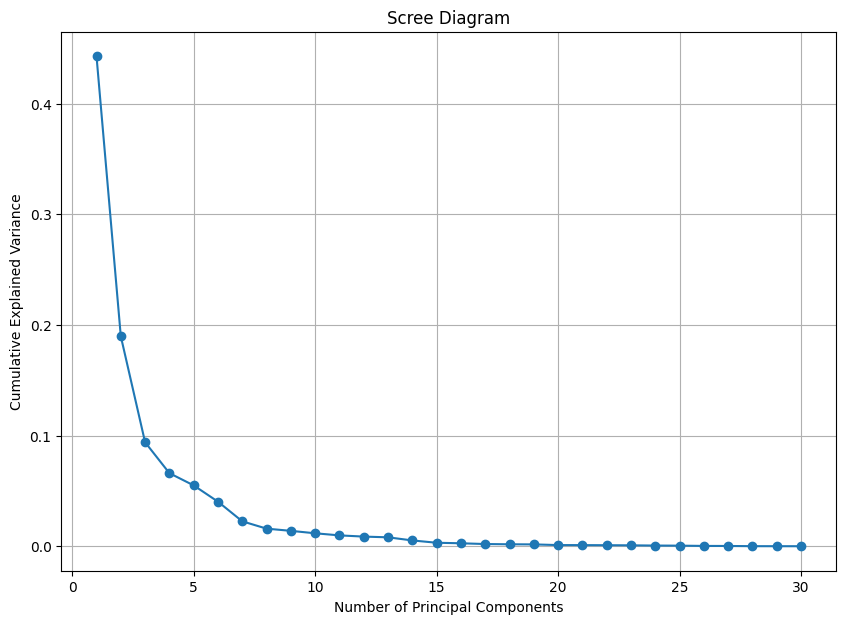

In [ ]:
# Calculate variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Plot Scree diagram
plt.figure(figsize=(10,7))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Diagram')
plt.grid(True)
plt.show()

The Scree diagram shows the cumulative explained variance of each principal component. We can observe the elbow point to determine the optimal number of principal components.

#### ***Step 6: Threshold Optimization***

In [ ]:
threshold = 0.95  # Minimum threshold of variance for each principal component
cumulative_variance = np.cumsum(explained_variance)
m = np.argmax(cumulative_variance >= threshold) + 1

By setting a threshold for cumulative explained variance, we can choose an optimal number of principal components that strike a balance between model complexity and accuracy.

#### ***Step 7: PCR Model***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
pca = PCA(n_components=m)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression()
model.fit(X_train_pca, y_train)
accuracy = model.score(X_test_pca, y_test)
print(f'Accuracy with {m} principal components: {accuracy:.2f}')

Accuracy with 10 principal components: 0.98


Here the model's accuracy for the 10 principle componenets is 98%.

The model's accuracy is highest when using a certain number of principal components. As we increase the number of components, the accuracy initially increases but then stabilizes or decreases due to overfitting.

#### ***Step 8: Accuracy vs. m Graph***

In [ ]:
accuracies = []
for i in range(1, X.shape[1] + 1):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    model.fit(X_train_pca, y_train)
    accuracy = model.score(X_test_pca, y_test)
    accuracies.append(accuracy)

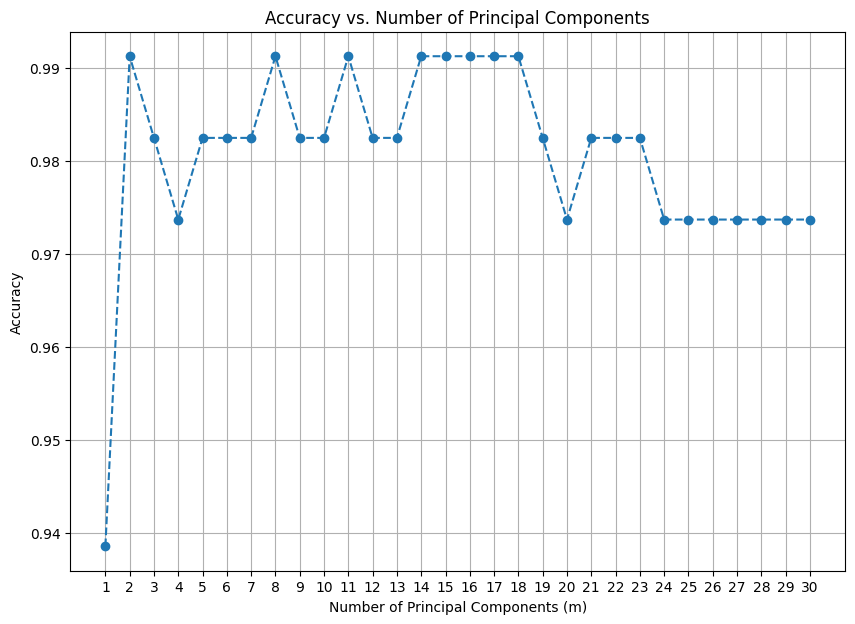

In [ ]:
# Plot Accuracy vs. m graph
plt.figure(figsize=(10,7))
plt.plot(range(1, X.shape[1] + 1), accuracies, marker='o',linestyle='--')
plt.xlabel('Number of Principal Components (m)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.xticks(range(1, X.shape[1] + 1))
plt.grid(True)
plt.show()

The Accuracy vs. m graph confirms the optimal number of principal components selected based on the threshold. It provides insight into how model accuracy varies with the number of components used for prediction.

## ***Conclusion***

The primary purpose of Principal Component Analysis (PCA) is to reduce the dimensionality of high-dimensional datasets while preserving as much information as possible. By identifying the directions, or principal components, along which the data varies the most. This reduction in dimensionality facilitates data visualization, exploration, and analysis, making it easier to interpret and understand complex datasets. PCA also aids in mitigating the curse of dimensionality, improving computational efficiency, and enhancing the performance of downstream machine learning algorithms. Additionally, PCA can be used for noise reduction, feature extraction, and data compression, making it a versatile tool in various domains such as image processing, finance, genetics, and social sciences.

Principal Component Regression (PCR) serves as a technique for building regression models in the presence of multicollinearity and high-dimensional predictor variables. The primary purpose of PCR is to address the challenges associated with traditional regression models when dealing with correlated predictors or datasets with more predictors than observations. By leveraging the dimensionality reduction capabilities of Principal Component Analysis (PCA), PCR simplifies the regression problem by transforming the predictors into a smaller set of orthogonal principal components.

Here we have used Logistic regression and PCR has helped to improve the regression model for the considered dataset.
